# Exogenous Causal Forest

In [1]:
import numpy as np
import scipy.special
np.random.seed(123)
n_samples = 5000
n_features = 100
n_treatments = 3
n_outputs = 1
# true_te = lambda X: np.hstack([X[:, [0]]**2 + 1, np.ones((X.shape[0], n_treatments - 1))])
# true_te = lambda X: np.hstack([X[:, [0]]>0, np.ones((X.shape[0], n_treatments - 1))])
true_te = lambda X: np.hstack([(X[:, [0]]>0) * X[:, [0]],
                               np.ones((X.shape[0], n_treatments - 1))*np.arange(1, n_treatments).reshape(1, -1)])
X = np.random.normal(0, 1, size=(n_samples, n_features))
T = np.random.normal(0, 1, size=(n_samples, n_treatments))
for t in range(n_treatments):
    T[:, t] = np.random.binomial(1, scipy.special.expit(X[:, 0]))
y = np.sum(true_te(X) * T, axis=1, keepdims=True) + X[:, [0]]
X_test = X[:1000].copy()
X_test[:, 0] = np.linspace(np.percentile(X[:, 0], 1), np.percentile(X[:, 0], 99), 1000)

In [52]:
from econml.grf import CausalForest
est = CausalForest(criterion='mse', n_estimators=100, min_samples_leaf=20,
                   min_impurity_decrease = 0, max_samples=.9,
                   honest=True, verbose=1, n_jobs=-1, random_state=123)

In [53]:
est.fit(X, T, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: A column-vector T was passed when a 1d array was expected. Please change the shape of T to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


CausalForest(min_impurity_decrease=0, min_samples_leaf=20, n_jobs=-1,
             random_state=123, verbose=1)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


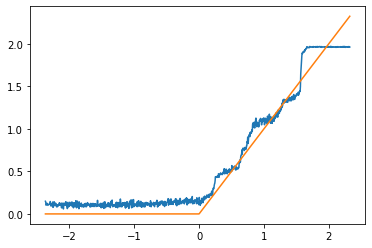

In [54]:
import matplotlib.pyplot as plt
pred_test_point = est.predict(X_test)
plt.plot(X_test[:, 0], pred_test_point)
plt.plot(X_test[:, 0], true_te(X_test))
plt.show()

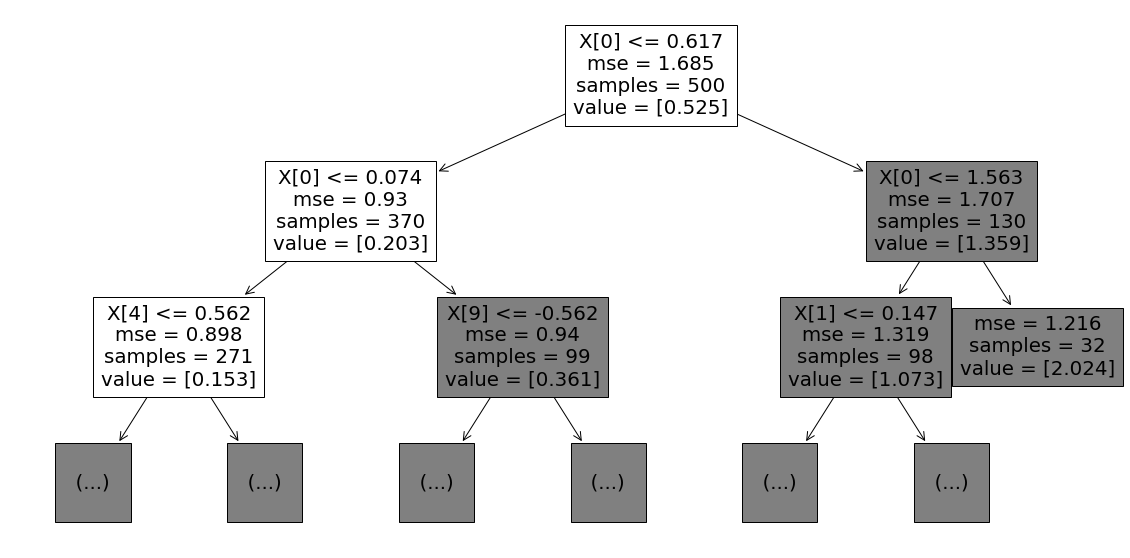

In [55]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
cast = DecisionTreeRegressor()
cast.tree_ = est[0].tree_
plt.figure(figsize=(20, 10))
plot_tree(cast, impurity=True, max_depth=2)
plt.show()

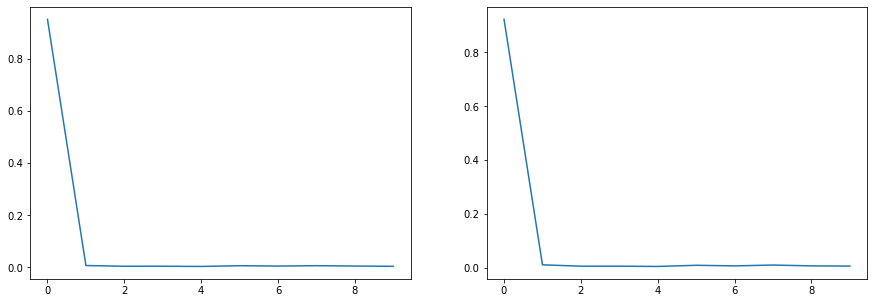

In [56]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(est.feature_importances_)
plt.subplot(1, 2, 2)
plt.plot(est.feature_heterogeneity_importances_)
plt.show()

In [62]:
est.decision_path(X_test[:1])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


(<1x2934 sparse matrix of type '<class 'numpy.int64'>'
 	with 658 stored elements in Compressed Sparse Row format>,
 array([   0,   31,   60,   89,  118,  151,  184,  213,  240,  269,  302,
         333,  362,  391,  420,  449,  476,  505,  538,  565,  594,  623,
         652,  681,  714,  739,  766,  797,  826,  855,  884,  917,  948,
         975, 1004, 1033, 1064, 1091, 1118, 1145, 1174, 1203, 1232, 1261,
        1288, 1317, 1344, 1369, 1402, 1431, 1462, 1495, 1526, 1555, 1586,
        1617, 1646, 1675, 1704, 1735, 1762, 1793, 1824, 1853, 1884, 1913,
        1940, 1967, 1994, 2023, 2054, 2083, 2110, 2137, 2168, 2195, 2222,
        2253, 2282, 2311, 2344, 2371, 2400, 2431, 2458, 2485, 2512, 2543,
        2574, 2603, 2634, 2663, 2692, 2721, 2752, 2785, 2812, 2839, 2872,
        2903, 2934], dtype=int32))

In [61]:
est.apply(X_test[:1])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([[12,  9, 17, 12, 12,  6, 14, 17, 13, 19, 13, 10,  7, 13, 16,  8,
        16,  7,  9, 10, 13, 11, 16, 22, 11, 13, 18,  9,  7, 20, 19, 14,
        15, 10, 10, 10, 16, 13, 17,  6,  7, 10, 15, 15,  8, 16, 13, 15,
        10, 15, 14, 12, 11, 13, 13,  7,  8, 13, 10, 16, 12,  8,  8, 17,
        14, 15,  5, 12, 14, 17, 17,  9, 11, 12, 14, 15, 13,  9,  9,  7,
        13, 14,  7,  5, 10, 12, 13, 13,  8, 15, 17, 15,  9, 18, 15, 12,
        10, 11, 13, 15]], dtype=int64)

# IV Causal Forest

In [1]:
import numpy as np
import scipy.special
np.random.seed(1227)
n_samples = 1000
n_features = 10
n_treatments = 1
n_outputs = 1
# true_te = lambda X: np.hstack([X[:, [0]]**2 + 1, np.ones((X.shape[0], n_treatments - 1))])
# true_te = lambda X: np.hstack([X[:, [0]]>0, np.ones((X.shape[0], n_treatments - 1))])
true_te = lambda X: np.hstack([(X[:, [0]]>0) * X[:, [0]],
                               np.ones((X.shape[0], n_treatments - 1))*np.arange(1, n_treatments).reshape(1, -1)])
Z = np.random.normal(0, 1, size=(n_samples, n_treatments))
X = np.random.normal(0, 1, size=(n_samples, n_features))
U = np.random.normal(0, .2, size=(n_samples, 1))
T = np.random.normal(0, 1, size=(n_samples, n_treatments))
for t in range(n_treatments):
    T[:, t] += U[:, 0] + Z[:, t]
y = np.sum(true_te(X) * T, axis=1, keepdims=True) + 5*U[:, [0]]
X_test = X[:1000].copy()
X_test[:, 0] = np.linspace(np.percentile(X[:, 0], 1), np.percentile(X[:, 0], 99), 1000)

In [48]:
from econml.grf import CausalIVForest
est = CausalIVForest(criterion='mse', n_estimators=1000, min_samples_leaf=20,
                   min_impurity_decrease = 0, max_samples=.9,
                   honest=True, verbose=1, n_jobs=-1, random_state=123)

In [49]:
est.fit(X, T, y, Z=Z)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: A column-vector T was passed when a 1d array was expected. Please change the shape of T to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\econml\grf\_forest_classes.py:269: UserWarning: A column-vector Z was passed when a 1d array was expected. Please change the shape of Z to (n_samples,), for example using ravel().
  alpha = self.get_alpha(X, Taug, y, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(

CausalIVForest(min_impurity_decrease=0, min_samples_leaf=20, n_estimators=1000,
               n_jobs=-1, random_state=123, verbose=1)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.2s finished


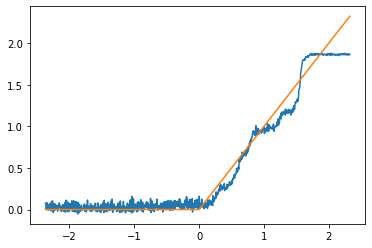

In [50]:
import matplotlib.pyplot as plt
pred_test_point = est.predict(X_test)
plt.plot(X_test[:, 0], pred_test_point)
plt.plot(X_test[:, 0], true_te(X_test))
plt.show()

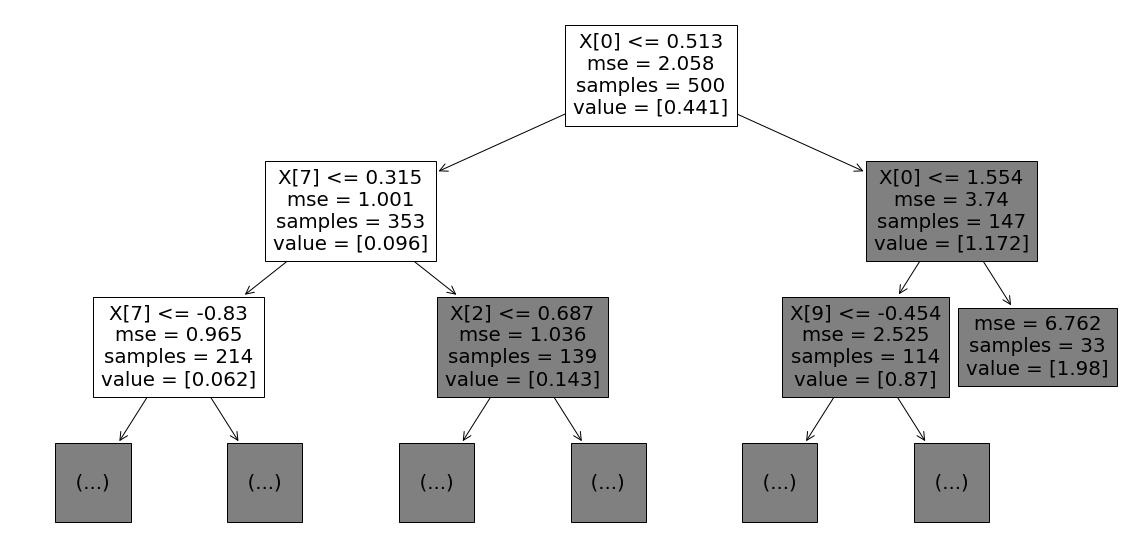

In [51]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(est[0], impurity=True, max_depth=2)
plt.show()

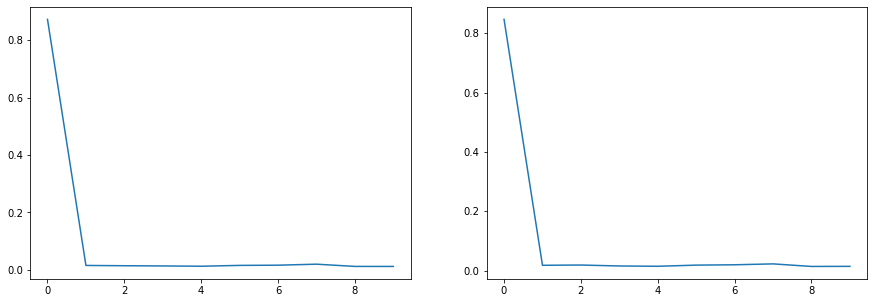

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(est.feature_importances_)
plt.subplot(1, 2, 2)
plt.plot(est.feature_heterogeneity_importances_)
plt.show()

In [63]:
est[0].decision_path(X_test[:1]).todense()

matrix([[1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)